# <center>**Projeto Final da disciplina Machine Learning I**

<center><img src="retain.jpg">


### **Descrição**

Este notebook apresenta uma análise de dados feita a partir de um dataset de Análise de Churn.

### **Identificação da equipe**

**Grupo 4:** Cícero Vicente, Jorge Dantas, Mohara Nascimento, Nathália Martins, Pedro Henrique

**Programa:** Santander Coders 2023

**Professor:** Guilherme Kaihami

### **Dataset**

O conjunto de dados utilizado neste projeto foi retirado diretamente do Kaggle. Cuja fonte é a seguinte:

- Análise de Churn (Telco Customer Churn): https://www.kaggle.com/datasets/blastchar/telco-customer-churn


### **Orientações para o projeto**

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informações sobre as variáveis em si e suas relações com as demais;

- **Modelagem dos dados**: Nessa parte, deve ser definido o tipo de problema (classificação/regressão). Vocês precisam **treinar pelo menos três (3) modelos** (pode ser testado mais que três modelos distintos) e de acordo com alguma métrica de avaliação (escolhida pelo grupo), decidir qual será o melhor modelo a ser utilizado!;

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.



### **Sumário**

1. [Dados iniciais](#1-dados-iniciais)

    1.1 [Descricao do problema](#11-descricao-do-problema)

    1.2 [Importacao de bibliotecas](#12-importacao-de-bibliotecas)

    1.3 [Carregamento do dataset](#13-carregamento-do-dataset)

    1.4 [Visao geral do dataset](#14-visao-geral-do-dataset)
2. [Tratamento dos dados](#2-tratamento-dos-dados)

    2.1 [Preparacao dos Dados e Verificacao de Consistencia](#21-preparacao-dos-dados-e-verificacao-de-consistencia)
3. [Analise exploratoria dos dados](#3-analise-exploratoria-dos-dados)

    3.1 [Estatistica descritiva](#31-estatistica-descritiva)

    3.2 [Informacoes gerais dos dados](#32-informacoes-gerais-dos-dados)

    3.3 [Exploracao dos dados e primeiras hipoteses](#33-exploracao-dos-dados-e-primeiras-hipoteses)
4. [Modelagem](#4-modelagem)

    4.1 [Modelagem com Arvore de Decisao](#41-modelagem-com-arvore-de-decisao)

    4.2 [Modelagem com Random Forest](#42-modelagem-com-random-forest)

    4.3 [Modelagem com Adaboost](#43-modelagem-com-adaboost)

    4.4 [Modelagem com Gradientboost](#44-modelagem-com-gradientboost)

    4.5 [Modelagem com LightGBM](#45-modelagem-com-lightgbm)

5. [Otimizacao de modelos](#5-otimizacao-de-modelos)

    5.1 [Otimizacao da Arvore de Decisao](#51-otimizacao-da-arvore-de-decisao)

    5.2 [Otimizacao do Random Forest](#52-otimizacao-do-random-forest)
6. [Conclusoes](#6-conclusoes)


### **[1. Dados iniciais](#1.-Dados-iniciais)**

#### **[1.1 Descricao do problema](#1.1-Descricao-do-problema)**

O problema de negócio avaliado neste projeto está relacionado ao *churn* no mercado de telecomunicações, ou seja, ao cancelamento ou não dos serviços adquiridos pelos clientes em uma determinada empresa. Avaliar os fatores que podem influenciar a taxa de *churn* é essencial para as estratégias de uma empresa, visto que, tendo conhecimento destes fatores a empresa pode focar em adaptar seus serviços para obter uma maior retenção de clientes. Tendo isso em vista, o presente projeto se baseará em investigar parâmetros como: o tipo de serviço contratado, perfil pessoal do cliente (idade, gênero, parceiros e dependentes) e dados relacionados à sua conta. Com o intuito de realizar inferências e propor um algoritmo que consiga mapear e classificar a possibilidade de churn ou não. 

#### **[1.2 Importacao de bibliotecas](#1.2-Importacao-de-bibliotecas)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from plotnine import *
from scipy.stats import norm, linregress
from matplotlib.widgets import Button
%matplotlib inline
#import ipywidgets as widgets
#from IPython.display import clear_output

Importações adicionais para quem for usar o Google Colab:

In [2]:
#Para quem for abrir no Google Colab descomentar as linhas abaixo:

#from google.colab import drive
#drive.mount('/content/drive')
#database = 'Dataset.csv'
#dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning I - Projeto Final/' + database)

#### **[1.3 Carregamento do dataset](#1.3-Carregamento-do-dataset)**

In [3]:
#Carregamento do DataSet
df_churn = pd.read_csv('Dataset.csv', sep=',')

#### **[1.4 Visao geral do dataset](#1.4-Visao-geral-do-dataset)**

In [4]:
#Mostra as 5 primeiras linhas do DataFrame
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Mostra as 5 primeiras linhas do DataFrame, de maneira transposta, para facilitar a visualização dos dados
df_churn.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
#Mostra as 5 últimas linhas do DataFrame, de maneira transposta, para facilitar a visualização dos dados
df_churn.tail().T

,7038,7039,7040,7041,7042
customerID,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,No
tenure,24,72,11,4,66
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,Yes,No,Yes


In [7]:
#Detalha as informações gerais e os tipos de dados do DataFrame
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Verifica a existência de nulos
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Verificar se há dados duplicados: 
df_churn.duplicated().sum()

0

### **[2. Tratamento dos dados](#2.-Tratamento-dos-dados)**

A partir da visualização geral do DataFrame pôde-se observar algumas inconsistências que serão explicadas e tratadas nos subtópicos a seguir.

#### **[2.1 Preparacao dos Dados e Verificacao de Consistencia](#2.1-Preparacao-dos-Dados-e-Verificacao-de-Consistencia)**


- Mudança do tipo da coluna 'TotalCharges'

A primeira inconsistência observada foi a do tipo de dado da coluna 'TotalCharges' que está definido como object quando deveria ser do tipo float, uma vez que seus valores são numéricos e decimais. 

Inicialmente, quando tentamos fazer a conversão de object para float, usando apenas o .astype(float) recebemos a mensagem de erro: ValueError: could not convert string to float: ' '. O que indicava que algumas colunas estavam vazias preenchidas com espaços e que deveriam ser tratadas antes da conversão. 

Para investigar que colunas eram essas e suas quantidades, realizamos o seguinte filtro:

In [10]:
df_churn.loc[df_churn['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Com isso, identificamos que existem 11 linhas onde o TotalCharges possui valor vazio. Assim, trocamos essas colunas para NaN para então fazer a conversão de tipo.

In [11]:
#Mudança de '' para NaN
df_churn['TotalCharges'] = df_churn['TotalCharges'].replace(' ', np.nan)

# Conversão da coluna para tipo float:
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype('float', errors='ignore')

Após isso chegamos num impasse de que valor (média ou mediana) utilizar para substituir os valores NaN. Para decidir isso plotamos um histograma.

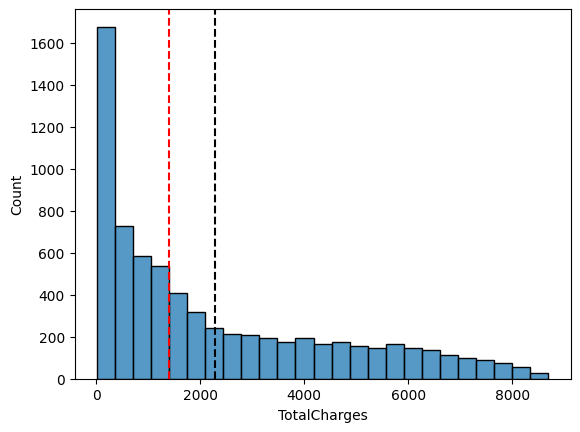

In [12]:
sns.histplot(df_churn['TotalCharges'])
plt.axvline(df_churn['TotalCharges'].mean(), ls='--', color='black')
plt.axvline(df_churn['TotalCharges'].median(),ls='--', color='red')

Com esse histograma podemos ver que os dados são muito dispersos para a direita, o que puxa a média para lá. Entretando, existe uma grande concentração de valores, com altas repetições, para a esquerda, onde a mediana se localiza. O que indica que ela é quem deve ser usada para a substituição.

Antes disso, fizemos um último teste com o np.log

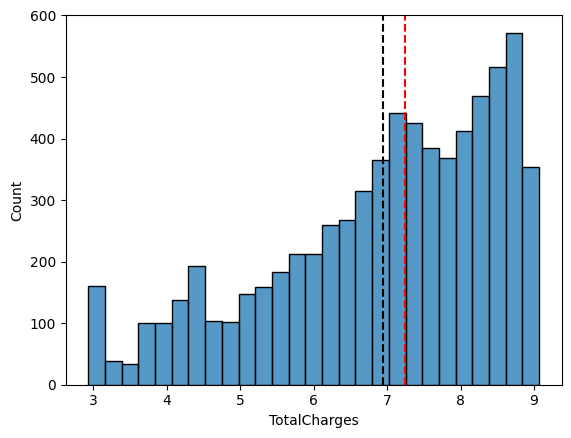

In [13]:
sns.histplot(np.log(df_churn['TotalCharges']))
plt.axvline(np.log(df_churn['TotalCharges']).mean(), ls='--', color='black')
plt.axvline(np.log(df_churn['TotalCharges']).median(),ls='--', color='red')

Assim, decidimos usar a mediana para substituir os NaN

In [14]:
df_churn['TotalCharges'].fillna(df_churn['TotalCharges'].median(), inplace=True)

In [15]:
df_churn['TotalCharges'].describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

- Excluir a coluna de customerID

Como esta é uma coluna que possui dados irrelevantes para os nossos modelos decidimos retirá-la do DataFrame.

In [16]:
df_churn.drop(columns='customerID', axis=1, inplace=True)

df_churn.head(1).T

,0
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,No
tenure,1
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,No
OnlineBackup,Yes


- Mudar a coluna gender de Female/Male para F/M

In [17]:
#Muda os valores Female e Male para F e M, respectivamente
df_churn['gender'].replace('Female', 'F', inplace=True)
df_churn['gender'].replace('Male', 'M', inplace=True)

df_churn['gender'].unique()

array(['F', 'M'], dtype=object)

- Mudar colunas Yes/No para 0/1

In [18]:
#salva os nomes das colunas
colunas = df_churn.columns 

#Muda Yes/No para 1/0 nas colunas que tem apenas esses dois valores
for c in colunas:
    if len(df_churn[c].unique())==2: df_churn[c].replace({'Yes':1, 'No':0}, inplace=True) 

df_churn.head().T

,0,1,2,3,4
gender,F,M,M,M,F
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


Além da mudança ter sido feita de forma correta, observe que as colunas que tem outros valores, além de Yes/No, não foram alteradas. Um exemplo é a coluna MultipleLines que tem Yes, No e No phone service.

- Realizar os dummies

In [19]:
df_churn = pd.get_dummies(
    df_churn, # dataset
    prefix_sep='_',
    columns=[
        'gender',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaymentMethod'
    ]
)

In [20]:
df_churn

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_F,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,True,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,False,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,False,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,0,False,...,False,False,True,False,True,False,False,False,False,True
7039,0,1,1,72,1,1,103.20,7362.90,0,True,...,False,False,True,False,True,False,False,True,False,False
7040,0,1,1,11,0,1,29.60,346.45,0,True,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,0,4,1,1,74.40,306.60,1,False,...,True,False,False,True,False,False,False,False,False,True


In [21]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   PaperlessBilling                         7043 non-null   int64  
 6   MonthlyCharges                           7043 non-null   float64
 7   TotalCharges                             7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   gender_F                                 7043 non-null   bool   
 10  gender_M                                 7043 no

### **[3. Analise exploratoria dos dados](#3.-Analise-exploratoria-dos-dados)**

#### **[3.1 Estatistica descritiva](#2.1-Estatistica-descritiva)**

In [22]:
#Estatística descritiva

df_churn.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.916928,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


#### **[3.2 Informacoes gerais dos dados](#3.1-Informacoes-gerais-dos-dados)**

In [23]:
#Informações gerais dos dados

df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   PaperlessBilling                         7043 non-null   int64  
 6   MonthlyCharges                           7043 non-null   float64
 7   TotalCharges                             7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   gender_F                                 7043 non-null   bool   
 10  gender_M                                 7043 no

#### **[3.3 Exploracao dos dados e primeiras hipoteses](#3.3-Exploracao-dos-dados-e-primeiras-hipoteses)**

c:\Users\mohar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


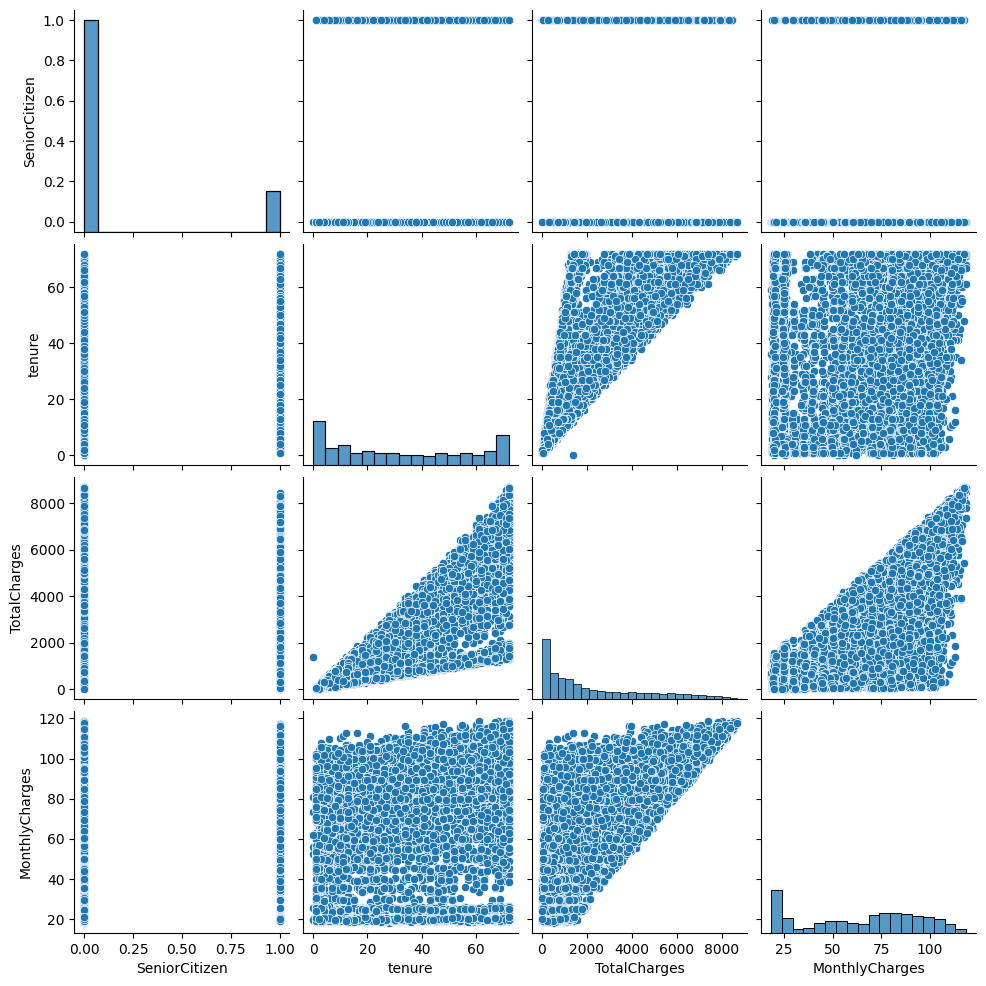

In [24]:
#Mostra a distribuição dos dados par a par de algumas colunas

sns.pairplot(df_churn, vars=['SeniorCitizen', 'tenure', 'TotalCharges','MonthlyCharges'])

Este primeiro gráfico apresentado é interessante pois mostra como as variáveis se distribuem, tanto entre si, quanto par a par. Através dele, é possível ver, de forma clara, as colunas que assumem apenas alguns valores únicos, como a SeniorCitizen que só tem os valores 0 e 1, e as colunas que variam em um intervalo como a tenure, a MonthlyChangers e a TotalCharges. Além disso, é possível ver a quantidade de vezes em que essas variáveis assumem determinados valores e avaliar o tipo de distribuição que representam, como a de MonthluCharges que, pelo gráfico, é próxima de uma distribuição normal e a TotalCharges que se assemelha à uma distribuição lognormal.

c:\Users\mohar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


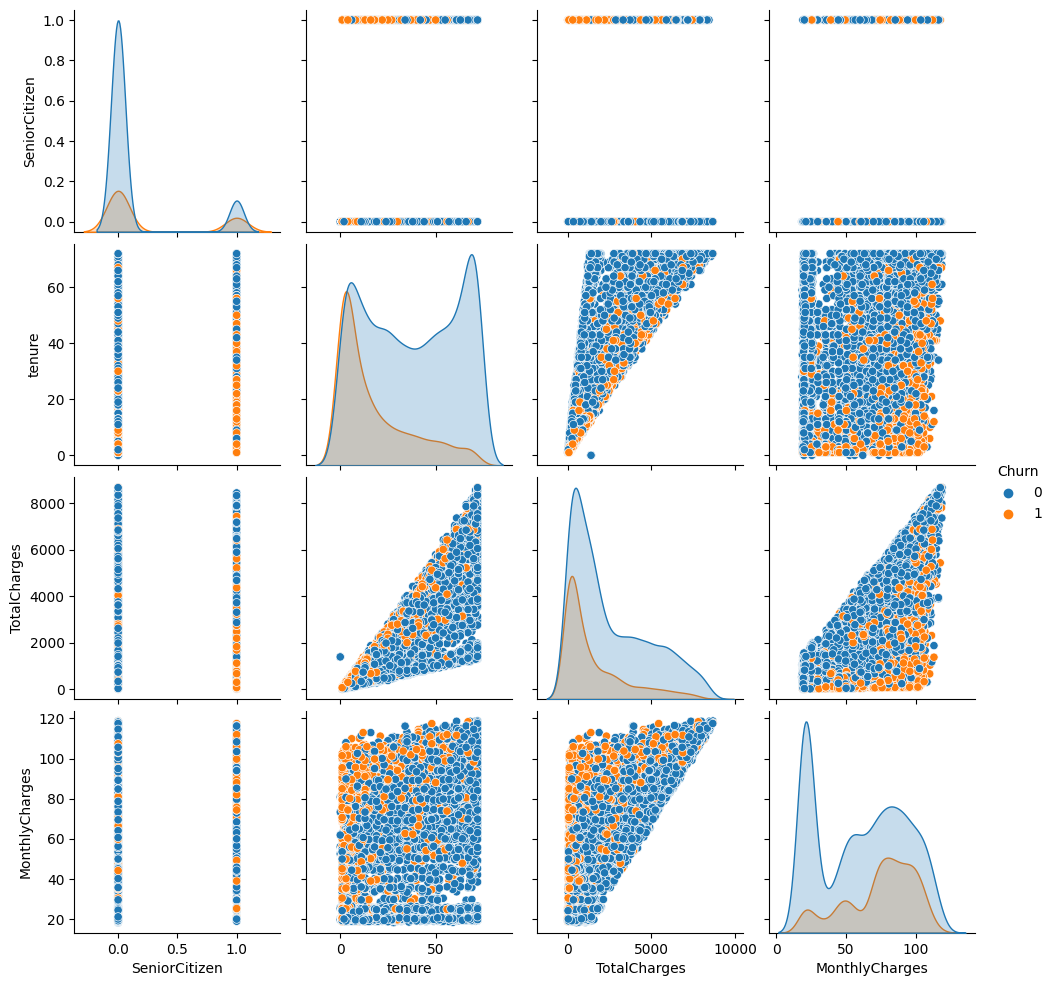

In [25]:
#Relação entre algumas variáveis de acordo com o Churn

#sns.pairplot(df_churn, hue='Churn')
sns.pairplot(df_churn, vars=['SeniorCitizen', 'tenure', 'TotalCharges','MonthlyCharges'], hue='Churn')


### **[4. Modelagem](#4.-Modelagem)**

#### **[4.1 Modelagem com Arvore de Decisao](#4.1-Modelagem-com-Arvore-de-Decisao)**

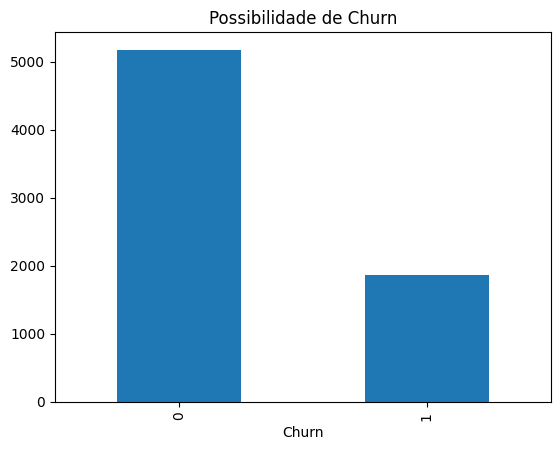

In [26]:
# Verificar se a base é desbalanceada através do target:
df_churn['Churn'].value_counts().plot(kind='bar')
plt.title('Possibilidade de Churn')
plt.show()

A partir do gráfico é possível ver que a base está desbalanceada e que esse desbalanceamento deve ser mantido no modelo de treino.

In [27]:
#  Separando os Atributos em X e o Target em y
X = df_churn.drop(['Churn'], axis=1)
y = df_churn['Churn']

In [28]:
# Separando a base em treino e teste, dividindo em 70% para treino e 30% para teste:
from sklearn import model_selection

X_train, X_test, y_train, y_test =(model_selection.train_test_split(X, y, test_size=0.3, stratify=y, random_state=42))

In [29]:
# Primeiro modelo escolhido: Árvore de Decisão. Será testada inicialmente com seus valores default:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# Valores default:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
# Predição a partir da amostra de teste:
y_pred = model.predict(X_test)

ref_arvore = y_pred

# Métricas obtidas:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1552
           1       0.50      0.50      0.50       561

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [31]:
print(f'Precision score: {metrics.precision_score(y_test, y_pred):.4f}')
print(f'Recall score: {metrics.recall_score(y_test, y_pred):.4f}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred):.4f}')

Precision score: 0.4956
Recall score: 0.4973
F1 score: 0.4964


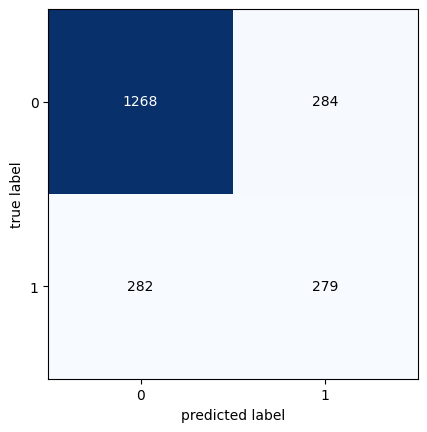

In [32]:
# Matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

def plot_cm(y_test, y_pred): 
  cm = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(conf_mat=cm)
  plt.show()

plot_cm(y_test, y_pred)

#### **[4.2 Modelagem com Random Forest](#4.2-Modelagem-com-Random-Forest)**

In [33]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest com uso de 100 árvores
random_model = RandomForestClassifier(
    n_estimators=100,  # Número de árvores
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
#    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,  # OOB
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

random_model.fit(X_train, y_train)

y_pred = random_model.predict(X_test)

ref_random_forest = y_pred

print(metrics.classification_report(y_test, y_pred))

ps_test = metrics.precision_score(y_test, y_pred)
rs_test = metrics.recall_score(y_test, y_pred) 
f1s_test = metrics.f1_score(y_test, y_pred)

print(f'Precision score: {metrics.precision_score(y_test, ref_arvore):.4f} (Com árvore), {ps_test:.4f} (Com Random Forest)')
print(f'Recall score: {metrics.recall_score(y_test, ref_arvore  ):.4f} (Com árvore), {rs_test:.4f} (Com Random Forest)')
print(f'F1 score: {metrics.f1_score(y_test, ref_arvore):.4f} (Com árvore), {f1s_test:.4f} (Com Random Forest)\n')

print(f'Diferença percentual entre os modelos: \nPrecision Score: {100*(((ps_test/metrics.precision_score(y_test, ref_arvore)))-1):.2f}% \nRecall Score: {100*(((rs_test/metrics.recall_score(y_test, ref_arvore)))-1):.2f}% \nF1 Score: {100*(((rs_test/metrics.f1_score(y_test, ref_arvore)))-1):.2f}%')

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

Precision score: 0.4956 (Com árvore), 0.6105 (Com Random Forest)
Recall score: 0.4973 (Com árvore), 0.4973 (Com Random Forest)
F1 score: 0.4964 (Com árvore), 0.5481 (Com Random Forest)

Diferença percentual entre os modelos: 
Precision Score: 23.19% 
Recall Score: 0.00% 
F1 Score: 0.18%


Comparando as métricas com as apresentadas pelo modelo de Árvore de decisão, é possível ver que houve uma leve melhora nos resultados, o que já era esperado, uma vez que o Random Forest expande as possibilidades de escolhas com a criação de árvores aleatórias. 

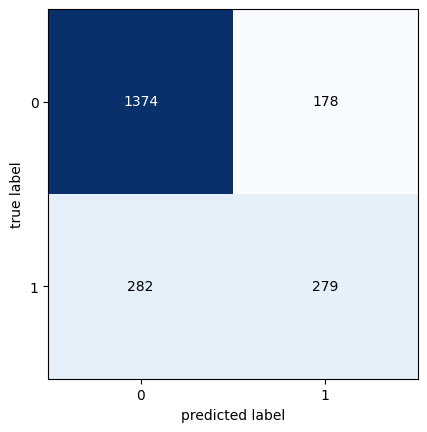

In [34]:
forest_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=forest_cm)
plt.show()

#### **[4.3 Modelagem com Adaboost](#4.3-Modelagem-com-Adaboost)**

In [35]:
from sklearn.ensemble import AdaBoostClassifier

ad_model = AdaBoostClassifier(
    n_estimators=50,
    random_state=42
    )

ad_model.fit(X_train, y_train)

y_pred = ad_model.predict(X_test)

ref_adaboosting = y_pred

print(metrics.classification_report(y_test, y_pred))

print(f'Precision score: {metrics.precision_score(y_test, y_pred):.4f}')
print(f'Recall score: {metrics.recall_score(y_test, y_pred):.4f}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred):.4f}')

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Precision score: 0.6460
Recall score: 0.5205
F1 score: 0.5765


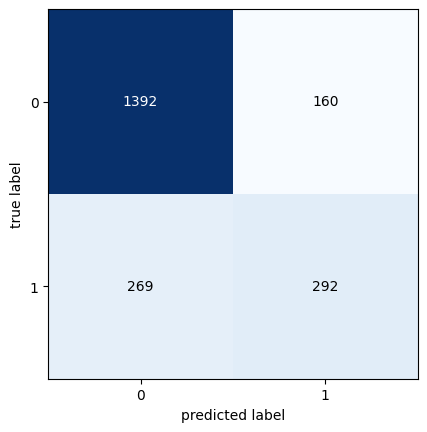

In [36]:
ad_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(ad_cm)
plt.show()

#### **[4.4 Modelagem com Gradientboost](#4.4-Modelagem-com-Gradientboost)**

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

grad_model = GradientBoostingClassifier(random_state=42)

grad_model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ref_gradientboost = y_pred

print(metrics.classification_report(y_test, y_pred))

print(f'Precision score: {metrics.precision_score(y_test, y_pred):.4f}')
print(f'Recall score: {metrics.recall_score(y_test, y_pred):.4f}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred):.4f}')

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1552
           1       0.50      0.50      0.50       561

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113

Precision score: 0.4956
Recall score: 0.4973
F1 score: 0.4964


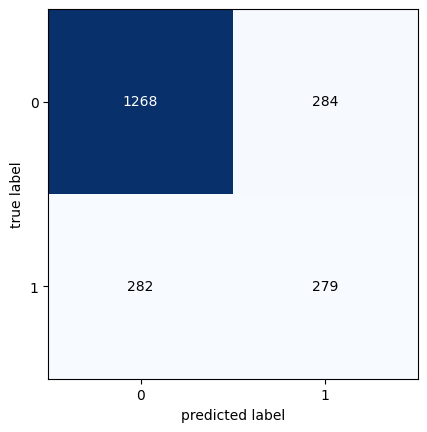

In [38]:
grad_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=grad_cm)
plt.show()

#### **[4.5 Modelagem com LightGBM](#4.4-Modelagem-com-LightGBM)**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265314 -> initscore=-1.018527
[LightGBM] [Info] Start training from score -1.018527
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.50      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.77      0.79      0.78      2113

Precision score: 0.6189
Recall score: 0

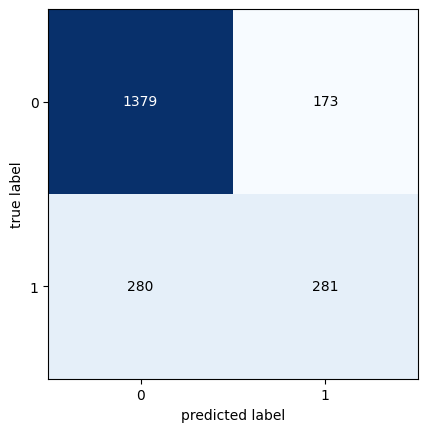

In [39]:
import lightgbm as lgb

#Modelo LightGBM, modelo otimizado do Gradient boosting
model_lgb = lgb.LGBMClassifier(random_state=42)

model_lgb.fit(X_train, y_train)

y_pred = model_lgb.predict(X_test)

ref_lightgbm = y_pred

print(metrics.classification_report(y_test, y_pred))
lgb_cm = confusion_matrix(y_test, y_pred)

print(f'Precision score: {metrics.precision_score(y_test, y_pred):.4f}')
print(f'Recall score: {metrics.recall_score(y_test, y_pred):.4f}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred):.4f}')

plot_confusion_matrix(conf_mat=lgb_cm)
plt.show()

### **[5. Otimizacao de modelos](#5.-Otimizacao-de-modelos)**

#### **[5.1 Otimizacao da Arvore de Decisao](#5.1-Otimizacao-da-Arvore-de-Decisao)**

In [40]:
# Utilização do Grid Search para otimizar os hiperparâmetros, levando em consideração a Árvore de Decisão:

# Range para os hiperparâmetros
max_depth = [int(x) for x in np.linspace(1, 30, num=8)]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 3, 5]

params_grid = {
  "criterion": ['gini', 'entropy', 'log_loss'],
  "max_depth": max_depth,
  "min_samples_split": min_samples_split,
  "min_samples_leaf": min_samples_leaf,
}

# Grid Search
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=model,
    param_grid = params_grid,
    scoring='recall',
    cv=3, 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Melhor parâmetro grid_search
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [41]:
# Treinando o modelo de Árvore de Decisão com os melhores parâmetros obtidos a partir do Grid Search:
model_gs = DecisionTreeClassifier(**grid_search.best_params_)
model_gs.fit(X_train, y_train)

y_pred_gs = model_gs.predict(X_test)
print(metrics.classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1552
           1       0.56      0.55      0.56       561

    accuracy                           0.77      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113



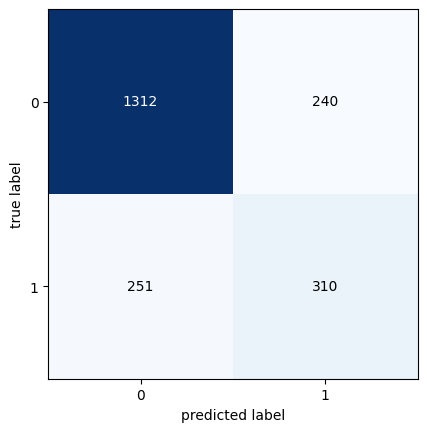

In [42]:
# Matriz de confusão a partir do novo modelo otimizado:
def plot_cm(y_test, y_pred): # cm -> matriz de confusão
  cm = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(conf_mat=cm)
  plt.show()

plot_cm(y_test, y_pred_gs)

#### **[5.2 Otimizacao do Random Forest](#5.2-Otimizacao-do-Random-Forest)**

- Aumento do número de árvores

Para tentar melhorar o resultado da Random Forest, serão feitos treinamentos modificando os hiperparâmetros. A começar pelo n_estimators (número de árvores) que será modificado de 100 para 1000.

In [47]:
#Random Forest com uso de 1000 árvores
random_model_1000 = RandomForestClassifier(
    n_estimators=1000,  # Número de árvores
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
#    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,  # OOB
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

random_model_1000.fit(X_train, y_train)

y_pred = random_model_1000.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

ps_test = metrics.precision_score(y_test, y_pred)
rs_test = metrics.recall_score(y_test, y_pred) 
f1s_test = metrics.f1_score(y_test, y_pred)

print(f'Precision score: {metrics.precision_score(y_test, ref_random_forest):.4f} (RF inicial), {metrics.precision_score(y_test, y_pred):.4f} (RF 1000 árvores)')
print(f'Recall score: {metrics.recall_score(y_test, ref_random_forest):.4f} (RF inicial), {metrics.recall_score(y_test, y_pred):.4f} (RF 1000 árvores)')
print(f'F1 score: {metrics.f1_score(y_test, ref_random_forest):.4f} (RF inicial), {metrics.f1_score(y_test, y_pred):.4f} (RF 1000 árvores)')

print(f'Diferença percentual entre os modelos quando o GS scoring foi o recall: \nPrecision Score: {100*(((ps_test/metrics.precision_score(y_test, ref_random_forest)))-1):.2f}% \nRecall Score: {100*(((rs_test/metrics.recall_score(y_test, ref_random_forest)))-1):.2f}% \nF1 Score: {100*(((f1s_test/metrics.f1_score(y_test, ref_random_forest)))-1):.2f}%')

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.49      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113

Precision score: 0.6105 (RF inicial), 0.6142 (RF 1000 árvores)
Recall score: 0.4973 (RF inicial), 0.4938 (RF 1000 árvores)
F1 score: 0.5481 (RF inicial), 0.5474 (RF 1000 árvores)
Diferença percentual entre os modelos quando o GS scoring foi o recall: 
Precision Score: 0.60% 
Recall Score: -0.72% 
F1 Score: -0.13%


Mesmo com o aumento de árvores não houve muito ganho de informações, os valores dos modelos com 100 e 1000 árvores tiveram resultados bem semelhantes, o que pode ser justificado pela possível duplicação dos dados treinados.

- Otimização com Grid Search

Ainda na modificação das árvores, vamos partir para técnicas de otimização mais sofisticadas, que combinem e variem melhor os hiperparâmetros. Para isso vamos vazer testes com o Grid Search.

In [48]:
#Define os intervalos de valores que serão testados em cada parâmetro
n_estimators = [int(x) for x in np.linspace(start=10, stop=500, num=3)]
max_depth = [int(x) for x in np.linspace(10, 30, num=3)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

#Cria o set de parâmetros de teste
params_grid = {
  "n_estimators": n_estimators,
  "max_depth": max_depth,
  "min_samples_split": min_samples_split,
  "min_samples_leaf": min_samples_leaf,
}

from sklearn.model_selection import GridSearchCV

#Realiza o GridSearch
grid_search_accuracy = GridSearchCV(
    estimator=random_model, # Modelo
    param_grid = params_grid,
    scoring='accuracy',
    cv=3, # Número folds para validação cruzada
    verbose=2,
    n_jobs=-1
)

grid_search_accuracy.fit(X_train, y_train)
grid_search_accuracy.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 255}

In [49]:
grid_search_recall = GridSearchCV(
    estimator=random_model, # Modelo
    param_grid = params_grid,
    scoring='recall',
    cv=3, # Número folds para validação cruzada
    verbose=2,
    n_jobs=-1
)

grid_search_recall.fit(X_train, y_train)
grid_search_recall.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 255}

Com esses parâmetros vamos verificar a melhora do resultado.

In [50]:
#Random Forest com uso ddos parâmetros do GridSearch e scoring accuracy
random_model_grid = RandomForestClassifier(
    n_estimators=255,  # valor obtido com o GS
    criterion='gini',
    max_depth=10, # valor obtido com o GS
    min_samples_split=10, # valor obtido com o GS
    min_samples_leaf=1, # valor obtido com o GS
    min_weight_fraction_leaf=0.0,
#    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,  # OOB
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

random_model_grid.fit(X_train, y_train)

y_pred = random_model_grid.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

ps_test = metrics.precision_score(y_test, y_pred)
rs_test = metrics.recall_score(y_test, y_pred) 
f1s_test = metrics.f1_score(y_test, y_pred)

print(f'Diferença percentual entre os modelos quando o GS scoring foi a acurácia: \nPrecision Score: {100*(((ps_test/metrics.precision_score(y_test, ref_random_forest)))-1):.2f}% \nRecall Score: {100*(((rs_test/metrics.recall_score(y_test, ref_random_forest)))-1):.2f}% \nF1 Score: {100*(((f1s_test/metrics.f1_score(y_test, ref_random_forest)))-1):.2f}% \n')

#Random Forest com uso ddos parâmetros do GridSearch e scroing recall
random_model_grid = RandomForestClassifier(
    n_estimators=255,  # valor obtido com o GS
    criterion='gini',
    max_depth=10, # valor obtido com o GS
    min_samples_split=2, # valor obtido com o GS
    min_samples_leaf=1, # valor obtido com o GS
    min_weight_fraction_leaf=0.0,
#    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,  # OOB
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

random_model_grid.fit(X_train, y_train)

y_pred = random_model_grid.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

ps_test = metrics.precision_score(y_test, y_pred)
rs_test = metrics.recall_score(y_test, y_pred) 
f1s_test = metrics.f1_score(y_test, y_pred)

print(f'Diferença percentual entre os modelos quando o GS scoring foi o recall: \nPrecision Score: {100*(((ps_test/metrics.precision_score(y_test, ref_random_forest)))-1):.2f}% \nRecall Score: {100*(((rs_test/metrics.recall_score(y_test, ref_random_forest)))-1):.2f}% \nF1 Score: {100*(((f1s_test/metrics.f1_score(y_test, ref_random_forest)))-1):.2f}%')

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.65      0.50      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.79      2113

Diferença percentual entre os modelos quando o GS scoring foi a acurácia: 
Precision Score: 5.70% 
Recall Score: 1.08% 
F1 Score: 3.10% 

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.64      0.51      0.57       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.80      0.79      2113

Diferença percentual entre os modelos quando o GS scoring foi o recall: 
Precision Score: 5.62% 
Recall Score: 2.15% 
F1 Score: 3.68%


#### **[5.3 Otimizacao do Adaboost](#5.3-Otimizacao-do-Adaboost)**

- Modificação do n_estimators

Seguindo a mesma lógica da Random Forest, vamos otimizar primeiro com o aumento do n_estimators, só que dessa vez muda de 50 para 100.

In [51]:
ad_model_100 = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
    )

ad_model_100.fit(X_train, y_train)

y_pred = ad_model_100.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

ps_test = metrics.precision_score(y_test, y_pred)
rs_test = metrics.recall_score(y_test, y_pred) 
f1s_test = metrics.f1_score(y_test, y_pred)

print(f'Precision score: {metrics.precision_score(y_test, ref_adaboosting):.4f} (RF inicial), {ps_test:.4f} (RF com 100)')
print(f'Recall score: {metrics.recall_score(y_test, ref_adaboosting):.4f} (RF inicial), {rs_test:.4f} (RF com 100)')
print(f'F1 score: {metrics.f1_score(y_test, ref_adaboosting):.4f} (RF inicial), {f1s_test:.4f} (RF com 100)\n')

print(f'Diferença percentual entre os modelos: \nPrecision Score: {100*(((ps_test/metrics.precision_score(y_test, ref_adaboosting)))-1):.2f}% \nRecall Score: {100*(((rs_test/metrics.recall_score(y_test, ref_adaboosting)))-1):.2f}% \nF1 Score: {100*(((rs_test/metrics.f1_score(y_test, ref_adaboosting)))-1):.2f}%')

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.64      0.50      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.79      2113

Precision score: 0.6460 (RF inicial), 0.6432 (RF com 100)
Recall score: 0.5205 (RF inicial), 0.5045 (RF com 100)
F1 score: 0.5765 (RF inicial), 0.5654 (RF com 100)

Diferença percentual entre os modelos: 
Precision Score: -0.44% 
Recall Score: -3.08% 
F1 Score: -12.50%


Como os resultados pioraram com o aumento no n_estimators, decidimos diminuir o valor e avaliar se ele melhora ou se não influenciará.

In [52]:
ad_model_2 = AdaBoostClassifier(
    n_estimators=2,
    random_state=42
    )

ad_model_2.fit(X_train, y_train)

y_pred = ad_model_2.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

ps_test = metrics.precision_score(y_test, y_pred)
rs_test = metrics.recall_score(y_test, y_pred) 
f1s_test = metrics.f1_score(y_test, y_pred)

print(f'Precision score: {metrics.precision_score(y_test, ref_adaboosting):.4f} (RF inicial), {ps_test:.4f} (RF com 2)')
print(f'Recall score: {metrics.recall_score(y_test, ref_adaboosting):.4f} (RF inicial), {rs_test:.4f} (RF com 2)')
print(f'F1 score: {metrics.f1_score(y_test, ref_adaboosting):.4f} (RF inicial), {f1s_test:.4f} (RF com 2)\n')

print(f'Diferença percentual entre os modelos: \nPrecision Score: {100*(((ps_test/metrics.precision_score(y_test, ref_adaboosting)))-1):.2f}% \nRecall Score: {100*(((rs_test/metrics.recall_score(y_test, ref_adaboosting)))-1):.2f}% \nF1 Score: {100*(((rs_test/metrics.f1_score(y_test, ref_adaboosting)))-1):.2f}%')

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1552
           1       0.54      0.61      0.57       561

    accuracy                           0.76      2113
   macro avg       0.70      0.71      0.70      2113
weighted avg       0.77      0.76      0.76      2113

Precision score: 0.6460 (RF inicial), 0.5410 (RF com 2)
Recall score: 0.5205 (RF inicial), 0.6114 (RF com 2)
F1 score: 0.5765 (RF inicial), 0.5741 (RF com 2)

Diferença percentual entre os modelos: 
Precision Score: -16.25% 
Recall Score: 17.47% 
F1 Score: 6.05%


Com a diminuição do n_estimators é possível ver que, apesar da precisão ter piorado, o Recall melhorou. O que gera um resultado mais satifatório, visto que essa é nossa principal métrica.

- Uso de Grid Search

In [53]:
from pprint import pprint
pprint("Parâmetros da Adaboost:")
pprint(ad_model.get_params())

'Parâmetros da Adaboost:'
{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}


In [54]:
n_estimators = [int(x) for x in np.linspace(start=1, stop=500, num=3)]
learning_rate = [int(x) for x in np.linspace(1, 30, num=3)]
random_state = [int(x) for x in np.linspace(1, 100, num=3)]

params_grid = {
  "n_estimators": n_estimators,
  "learning_rate": learning_rate,
  "random_state": random_state,
}

grid_search = GridSearchCV(
    estimator=ad_model, # Modelo
    param_grid = params_grid,
    scoring='recall',
    cv=3, # Número folds para validação cruzada
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'learning_rate': 1, 'n_estimators': 250, 'random_state': 1}

In [55]:
ad_model_GS = AdaBoostClassifier(
    n_estimators=250,
    random_state=1,
    learning_rate= 1
    )

ad_model_GS.fit(X_train, y_train)

y_pred = ad_model_GS.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

ps_test = metrics.precision_score(y_test, y_pred)
rs_test = metrics.recall_score(y_test, y_pred) 
f1s_test = metrics.f1_score(y_test, y_pred)

print(f'Precision score: {metrics.precision_score(y_test, ref_adaboosting):.4f} (RF inicial), {ps_test:.4f} (RF com GS)')
print(f'Recall score: {metrics.recall_score(y_test, ref_adaboosting):.4f} (RF inicial), {rs_test:.4f} (RF com GS)')
print(f'F1 score: {metrics.f1_score(y_test, ref_adaboosting):.4f} (RF inicial), {f1s_test:.4f} (RF com GS)\n')

print(f'Diferença percentual entre os modelos: \nPrecision Score: {100*(((ps_test/metrics.precision_score(y_test, ref_adaboosting)))-1):.2f}% \nRecall Score: {100*(((rs_test/metrics.recall_score(y_test, ref_adaboosting)))-1):.2f}% \nF1 Score: {100*(((rs_test/metrics.f1_score(y_test, ref_adaboosting)))-1):.2f}%')

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Precision score: 0.6460 (RF inicial), 0.6502 (RF com GS)
Recall score: 0.5205 (RF inicial), 0.5169 (RF com GS)
F1 score: 0.5765 (RF inicial), 0.5760 (RF com GS)

Diferença percentual entre os modelos: 
Precision Score: 0.65% 
Recall Score: -0.68% 
F1 Score: -10.33%


- Uso de Random Search

In [56]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=ad_model,
    param_distributions=params_grid,
    n_iter=100, # Quantas rodadas para teste
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

model_rs = AdaBoostClassifier(**random_search.best_params_)
model_rs

Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Users\mohar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, n_estimators=250, random_state=1)

Curiosamente, os parâmetros encontrados foram os mesmos do GridSearch, não sendo necessário testar novamente o modelo.

### **[6. Conclusoes](#6.-Conclusoes)**

Os modelos com melhores resultados depois das otimizações foram (do pior para o melhor recall): Random Forest com Grid Search (0.51), Árvore de decisão com Grid Saearch (0.55) e Adaboost (0.61) com n_estimator de 2. Sendo que os modelos não otimizados Gradientboost e LigthGBM tiveram valores de recall de 0.50. 

Para ver as colunas do DataFrame que mais influenciaram nesses resultados, serão plotados 3 gráficos de barras para Random Forest com GS, Árvore de decisão com GS e Adaboost com otinização do n_estimators.

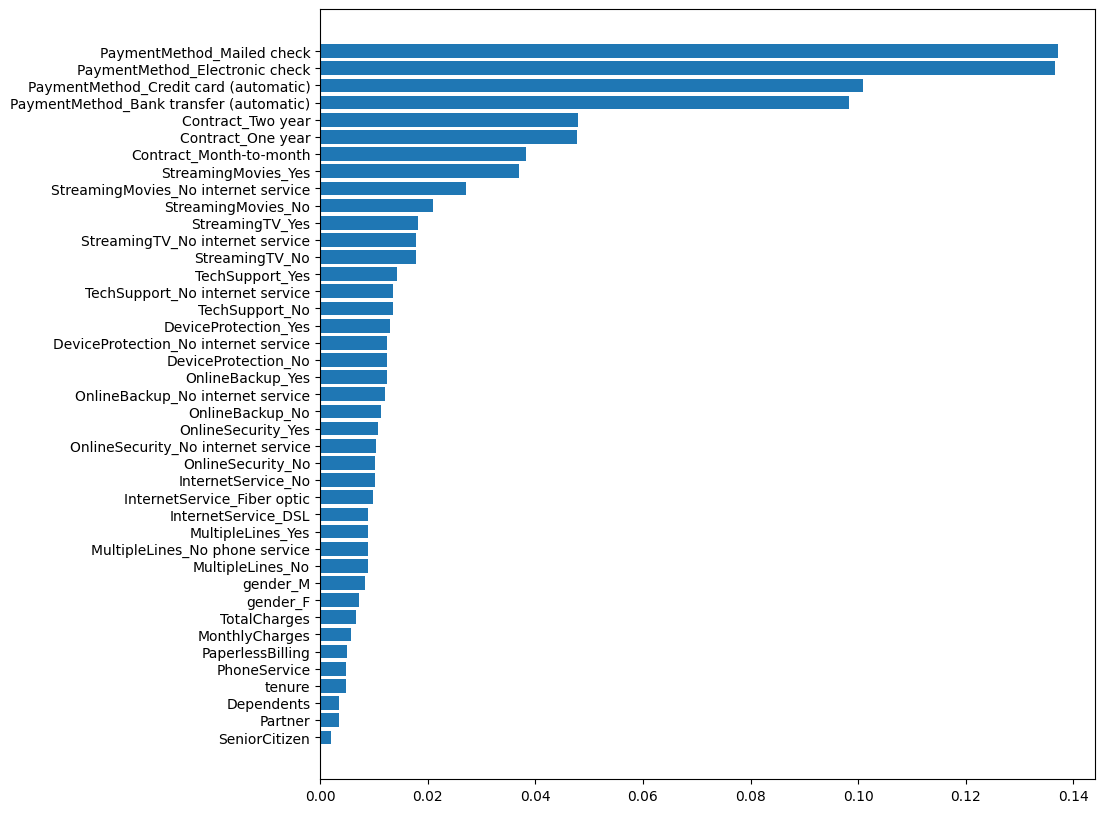

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(X.columns, sorted(random_model_grid.feature_importances_))

plt.show()

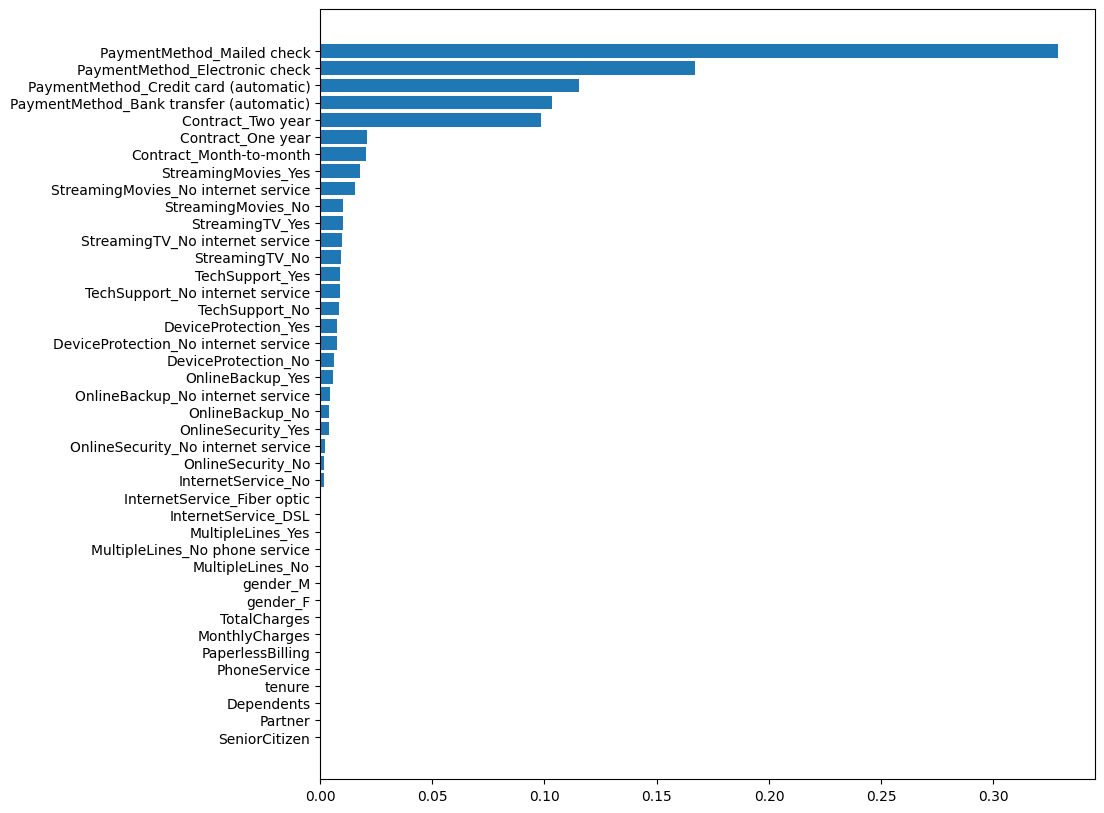

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(X.columns, sorted(model_gs.feature_importances_))

plt.show()

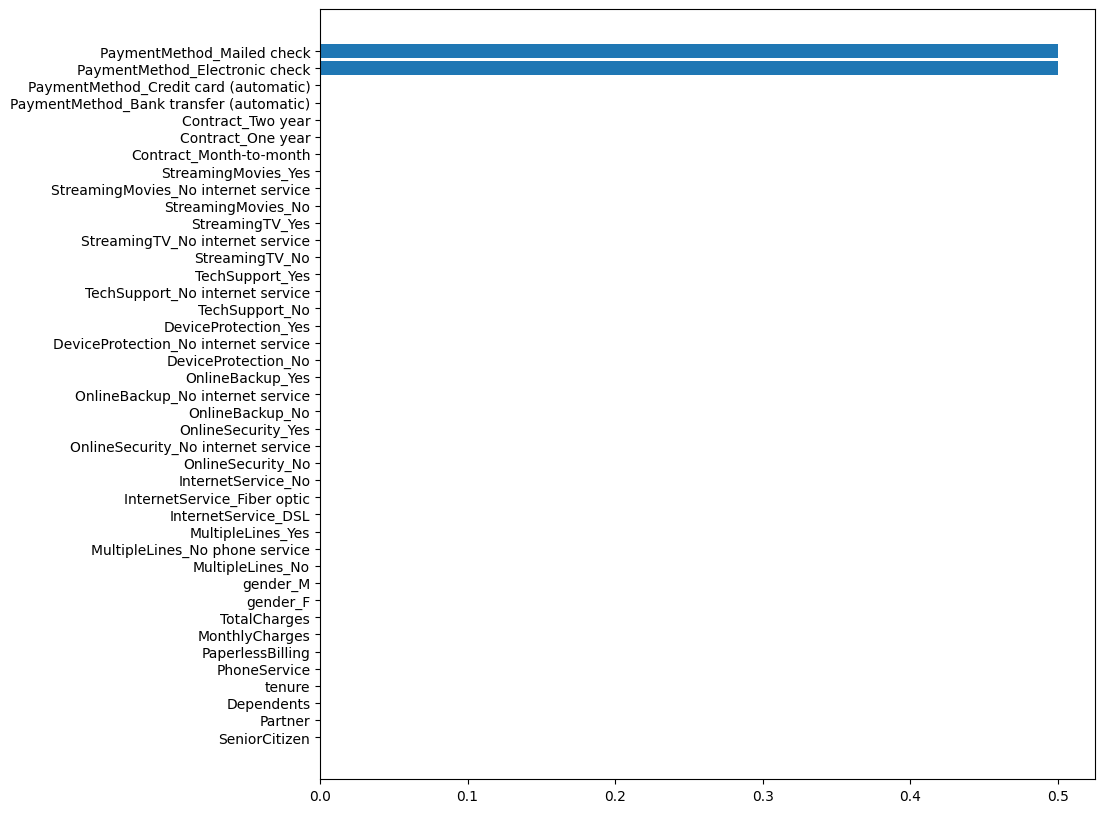

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(X.columns, sorted(ad_model_2.feature_importances_))

plt.show()

- Comparação entre os modelos com a curva ROC

In [79]:
from sklearn import metrics


def test_models_plot_roc_auc_curve(
        model_list,
        X_train,
        X_test,
        y_train,
        y_test):
    """
        model_list: Lista de modelos a serem testados
                    Formato (List[Dict[model_name|estimator, name|Model]])
        X_train: Dados de treino (features)
        X_test: Dados de teste (features)
        y_train: Dados de treino (alvo)
        y_test: Dados de teste (alvo)
    """

    response = {}
    for mdl in model_list:
        model = mdl.get('estimator')
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)


        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

        model_name = mdl.get('model_name')
        accuracy = metrics.accuracy_score(y_test, y_predict)
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        precision = metrics.precision_score(y_test, y_predict, average='weighted')
        recall = metrics.recall_score(y_test, y_predict, average='weighted')
        f1_score = metrics.f1_score(y_test, y_predict, average='weighted')
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl.get('model_name'), auc))

        print(f"Model      : {model_name}")
        print(f"Accuracy   : {accuracy:.4f} ")
        print(f"Precision  : {precision:.4f}")
        print(f"Recall     : {recall:.4f}")
        print(f"F1 - Score : {f1_score:.4f} ")
        print(f"ROC - AUC  : {auc:.4f} ")
        print("======================")

        response[mdl.get('model_name')]  = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score,
            "auc": auc,
        }


    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()
    return response

Model      : Árvore de decisão com GS
Accuracy   : 0.7690 
Precision  : 0.7678
Recall     : 0.7690
F1 - Score : 0.7684 
ROC - AUC  : 0.7011 
Model      : Random Forest com GS
Accuracy   : 0.7951 
Precision  : 0.7844
Recall     : 0.7951
F1 - Score : 0.7867 
ROC - AUC  : 0.7034 
Model      : AdaBoost com n_e=2
Accuracy   : 0.7591 
Precision  : 0.7699
Recall     : 0.7591
F1 - Score : 0.7636 
ROC - AUC  : 0.7120 
Model      : GradientBoosting
Accuracy   : 0.7960 
Precision  : 0.7847
Recall     : 0.7960
F1 - Score : 0.7867 
ROC - AUC  : 0.7012 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the

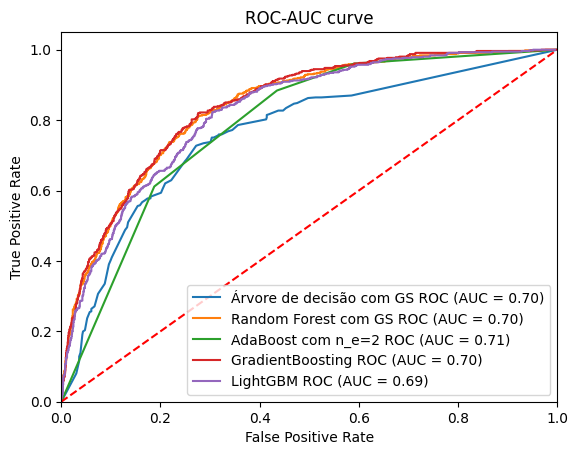

In [80]:
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

random_seed = 42

list_models = [
  {
      "model_name": "Árvore de decisão com GS",
      "estimator": model_gs
  },
  {
      "model_name": "Random Forest com GS",
      "estimator": random_model_grid
  },
  {
      "model_name": "AdaBoost com n_e=2",
      "estimator": ad_model_2
  },
  {
      "model_name": "GradientBoosting",
      "estimator": grad_model
  },
  {
      "model_name": "LightGBM",
      "estimator": model_lgb
  }
]

response_bank = test_models_plot_roc_auc_curve(
    list_models,
    X_train,
    X_test,
    y_train,
    y_test
)